<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-데이터-다운로드" data-toc-modified-id="Step-1.-데이터-다운로드-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step 1. 데이터 다운로드</a></span></li><li><span><a href="#Step-2.-데이터-정제-및-토큰화" data-toc-modified-id="Step-2.-데이터-정제-및-토큰화-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 2. 데이터 정제 및 토큰화</a></span></li><li><span><a href="#Step-3.-모델설계" data-toc-modified-id="Step-3.-모델설계-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 3. 모델설계</a></span><ul class="toc-item"><li><span><a href="#Positional-Encoding" data-toc-modified-id="Positional-Encoding-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Positional Encoding</a></span></li><li><span><a href="#Multi-Head-Attention" data-toc-modified-id="Multi-Head-Attention-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Multi-Head Attention</a></span></li><li><span><a href="#Position-wise-Feed-Forward-Network" data-toc-modified-id="Position-wise-Feed-Forward-Network-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Position-wise Feed-Forward Network</a></span></li><li><span><a href="#Encoder-레이어-구현하기" data-toc-modified-id="Encoder-레이어-구현하기-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Encoder 레이어 구현하기</a></span></li><li><span><a href="#Decoder-레이어-구현하기" data-toc-modified-id="Decoder-레이어-구현하기-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Decoder 레이어 구현하기</a></span></li><li><span><a href="#Encoder와-Decoder-클래스를-정의" data-toc-modified-id="Encoder와-Decoder-클래스를-정의-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Encoder와 Decoder 클래스를 정의</a></span></li><li><span><a href="#Transformer-완성하기" data-toc-modified-id="Transformer-완성하기-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Transformer 완성하기</a></span></li><li><span><a href="#Mask" data-toc-modified-id="Mask-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Mask</a></span></li></ul></li><li><span><a href="#Step-4.-훈련하기" data-toc-modified-id="Step-4.-훈련하기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 4. 훈련하기</a></span><ul class="toc-item"><li><span><a href="#Learning-Rate-Scheduler를-선언하고,-이를-포함하는-Adam-Optimizer를-선언" data-toc-modified-id="Learning-Rate-Scheduler를-선언하고,-이를-포함하는-Adam-Optimizer를-선언-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Learning Rate Scheduler를 선언하고, 이를 포함하는 Adam Optimizer를 선언</a></span></li><li><span><a href="#Loss-함수를-정의" data-toc-modified-id="Loss-함수를-정의-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loss 함수를 정의</a></span></li><li><span><a href="#train_step-함수를-정의" data-toc-modified-id="train_step-함수를-정의-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>train_step 함수를 정의</a></span></li><li><span><a href="#Attention-시각화-함수" data-toc-modified-id="Attention-시각화-함수-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Attention 시각화 함수</a></span></li><li><span><a href="#번역생성함수" data-toc-modified-id="번역생성함수-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>번역생성함수</a></span></li><li><span><a href="#학습" data-toc-modified-id="학습-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>학습</a></span></li></ul></li><li><span><a href="#Step-5.-평가" data-toc-modified-id="Step-5.-평가-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 5. 평가</a></span></li></ul></div>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import time
import re
import os
import io


# from tqdm import tqdm_notebook 
from tqdm.notebook import tqdm 
import random

import sentencepiece as spm
from konlpy.tag import Mecab

# Step 1. 데이터 다운로드
   

In [2]:
# train data load
data_dir = os.getenv('HOME')+'/aiffel/aiffelthon/data'
data_train_path = data_dir+"/Train_set_data.csv"
data_test_path = data_dir+"/Test_set_data_sampling(0223).csv"
full_data = pd.read_csv(data_train_path)
full_data_test = pd.read_csv(data_test_path)

In [3]:
full_data

,text,dial,reg,eng
0,생각이 쪼금씩 바뀌더라고,생각이 쪼금씩 바뀌드라고,jd,I've changed my mind a little bit.
1,어 알겠는가 외국인들이 그래도 잘 적응하고,어 알겄는가 외국인들이 그래도 잘 적응하고,jd,You know what? Foreigners still get used to it.
2,아으 갑자기 예전에 맹장 뜯은 게 생각난다.,아으 갑자기 예전에 맹장 뜯은 게 생각난디야.,jd,"All of a sudden, I think I've ripped off my ap..."
3,보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,jd,I have a lot of ideas about getting older in a...
4,약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도,약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도,jd,"It's a little bit of a tastey, but still..."
...,...,...,...,...
1065913,뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게 시켜먹는...,뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게 시켜먹는...,jd,I suppose I dont just go out to the nearest pl...
1065914,너는 만약에 그런 시대가 오면 네가 어떻게 활동할 것 같애?,너는 만약에 그런 시대가 오면 니가 어떻게 활동할 것 같애?,gs,How do you think you will be active when that ...
1065915,하이브도 있고 #조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는데,하이브도 있고 조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는디,jd,There is a hive a webtoon called the area of J...
1065916,추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이니까 할 말도 많고 이~,추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이난이 할 말도 많고 이~,jj,On Chuseok relatives and cousins only gathered...


In [4]:
# for test
# full_data = full_data.sample(frac=1).reset_index(drop=True)
# full_data = full_data[:20000]
# full_data

In [5]:
full_data_test

,text,dial,reg,eng
0,그니까 거기 그 사진 찍는아니야 주상절리 마냥,그니까 거기 그 사진 찍는아니 주상절리 마냥,jj,So youre not taking that picture there are you...
1,집에 있으면,집에 이시믄,jj,If you are at home
2,먹고 취하잖아 그러면 취하면 한이 있잖아 사람이 왜 이게,먹어지믄 취하잖아 겅하*믄이 취하면 한이 있네 사람이 왜 이게,jj,"You're eating and getting drunk, and if you're..."
3,그렇지 그렇게하겠지,그렇지 겅하겠주게,jj,Thats right Ill do that
4,나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줬어,나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줜,jj,I ot it as I know so I applied for another 100...
...,...,...,...,...
495,뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더라고요 그...,뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더라고요 그...,gs,Im worried about whether its stable or not bec...
496,잘 치거나 이렇게 했을 때 다 그냥 이렇게 손 한 번씩 다,잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다,gs,"When you hit well or did this, you're all just..."
497,아니 잘 안 맞지 넌,아니 잘 안 맞지 닌,gs,No it doesnt fit well you
498,진짜 너무 이거 조금 조금 미안하기도 하고 다른 사람들한테,진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테,gs,I'm so sorry about this.


In [6]:
# for test
# full_data_test = full_data_test.sample(frac=1).reset_index(drop=True)
# full_data_test = full_data_test[:500]
# full_data_test

In [7]:
# full_data=pd.concat([full_data, full_data_test], axis=0)

In [8]:
full_data.info() #full_data: 1065918 full_data_test: 500

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065918 entries, 0 to 1065917
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1065918 non-null  object
 1   dial    1065918 non-null  object
 2   reg     1065918 non-null  object
 3   eng     1065918 non-null  object
dtypes: object(4)
memory usage: 32.5+ MB


In [9]:
full_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    500 non-null    object
 1   dial    500 non-null    object
 2   reg     500 non-null    object
 3   eng     500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


In [10]:
full_data.isnull().sum()

text    0
dial    0
reg     0
eng     0
dtype: int64

In [11]:
full_data_test.isnull().sum()

text    0
dial    0
reg     0
eng     0
dtype: int64

In [12]:
def del_null_dupl(data):
    data=data.dropna(axis=0)
    data=data[~data.duplicated(subset=['text','dial','reg','eng'], keep= 'first')]
    data=data.reset_index(drop=True)# index reset하기 - 기존 index 제거 O
    return data

In [13]:
full_data=del_null_dupl(full_data) # ['text', 'dial', 'reg', 'eng'])
full_data_test=del_null_dupl(full_data_test) # ['text', 'dial', 'reg', 'eng'])

In [14]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065918 entries, 0 to 1065917
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1065918 non-null  object
 1   dial    1065918 non-null  object
 2   reg     1065918 non-null  object
 3   eng     1065918 non-null  object
dtypes: object(4)
memory usage: 32.5+ MB


In [15]:
full_data['eng_length'] = full_data['eng'].apply(lambda x : len(str(x).split()))
full_data['dial_length'] = full_data['dial'].apply(lambda x : len(str(x).split()))
full_data['eng_c_length'] = full_data['eng'].apply(lambda x : len(str(x)))
full_data['dial_c_length'] = full_data['dial'].apply(lambda x : len(str(x)))

In [16]:
regs = ['jj', 'jd', 'gs', 'cc', 'kw']

for reg in regs:
    count = full_data['dial'][full_data['reg']==reg].count()
    print(f'Dial_{reg} :', count)

Dial_jj : 259205
Dial_jd : 191023
Dial_gs : 121267
Dial_cc : 118955
Dial_kw : 375468


In [17]:
full_data.groupby(full_data['reg'])['eng_length'].mean()

reg
cc    14.616292
gs    13.540906
jd    14.027950
jj    11.170147
kw     9.538307
Name: eng_length, dtype: float64

In [18]:
full_data.groupby(full_data['reg'])['dial_length'].mean()

reg
cc    10.569098
gs     9.856927
jd     8.982960
jj     6.484350
kw     6.014824
Name: dial_length, dtype: float64

In [19]:
# eng_data = full_data[['eng', 'eng_length']]
# eng_data

In [20]:
# dial_data = full_data[['reg', 'dial', 'dial_length']]
# dial_data

In [21]:
full_data["reg_dial"] = "<" + full_data["reg"] +"> "+full_data["dial"]
full_data["reg_dial"]

0                                         <jd> 생각이 쪼금씩 바뀌드라고
1                               <jd> 어 알겄는가 외국인들이 그래도 잘 적응하고
2                             <jd> 아으 갑자기 예전에 맹장 뜯은 게 생각난디야.
3                  <jd> 보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.
4                           <jd> 약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도
                                 ...                        
1065913    <jd> 뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게...
1065914               <gs> 너는 만약에 그런 시대가 오면 니가 어떻게 활동할 것 같애?
1065915    <jd> 하이브도 있고 조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는디
1065916     <jj> 추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이난이 할 말도 많고 이~
1065917           <cc> 커피숍 가서 이케 먹고 하는 거가 훨씬 맛있거든 기분상으로도 그렇고
Name: reg_dial, Length: 1065918, dtype: object

In [22]:
full_data_test["reg_dial"] = "<" + full_data_test["reg"] +"> "+full_data_test["dial"]
full_data_test["reg_dial"]

0                          <jj> 그니까 거기 그 사진 찍는아니 주상절리 마냥
1                                            <jj> 집에 이시믄
2                <jj> 먹어지믄 취하잖아 겅하*믄이 취하면 한이 있네 사람이 왜 이게
3                                         <jj> 그렇지 겅하겠주게
4              <jj> 나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줜
                             ...                        
495    <gs> 뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더...
496                 <gs> 잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다
497                                     <gs> 아니 잘 안 맞지 닌
498                <gs> 진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테
499    <gs> 바퀴벌레가 방역을 해도 기어나와 가지고 이제는 쪼끔 마음이 쫌 나아지긴 했...
Name: reg_dial, Length: 500, dtype: object

In [23]:
full_data

,text,dial,reg,eng,eng_length,dial_length,eng_c_length,dial_c_length,reg_dial
0,생각이 쪼금씩 바뀌더라고,생각이 쪼금씩 바뀌드라고,jd,I've changed my mind a little bit.,7,3,34,13,<jd> 생각이 쪼금씩 바뀌드라고
1,어 알겠는가 외국인들이 그래도 잘 적응하고,어 알겄는가 외국인들이 그래도 잘 적응하고,jd,You know what? Foreigners still get used to it.,9,6,47,23,<jd> 어 알겄는가 외국인들이 그래도 잘 적응하고
2,아으 갑자기 예전에 맹장 뜯은 게 생각난다.,아으 갑자기 예전에 맹장 뜯은 게 생각난디야.,jd,"All of a sudden, I think I've ripped off my ap...",12,7,60,25,<jd> 아으 갑자기 예전에 맹장 뜯은 게 생각난디야.
3,보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,jd,I have a lot of ideas about getting older in a...,14,11,66,36,<jd> 보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.
4,약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도,약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도,jd,"It's a little bit of a tastey, but still...",9,9,43,27,<jd> 약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도
...,...,...,...,...,...,...,...,...,...
1065913,뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게 시켜먹는...,뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게 시켜먹는...,jd,I suppose I dont just go out to the nearest pl...,22,17,101,56,<jd> 뭐~ 맨날 집에서 인제 음식도 그냥 가까운 데 나가서 먹는 게 아니라 되게...
1065914,너는 만약에 그런 시대가 오면 네가 어떻게 활동할 것 같애?,너는 만약에 그런 시대가 오면 니가 어떻게 활동할 것 같애?,gs,How do you think you will be active when that ...,14,10,64,33,<gs> 너는 만약에 그런 시대가 오면 니가 어떻게 활동할 것 같애?
1065915,하이브도 있고 #조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는데,하이브도 있고 조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는디,jd,There is a hive a webtoon called the area of J...,21,12,93,44,<jd> 하이브도 있고 조석 작가 이제 조의 영역이라는 웹툰도 있고 마음의 소리도 있는디
1065916,추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이니까 할 말도 많고 이~,추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이난이 할 말도 많고 이~,jj,On Chuseok relatives and cousins only gathered...,19,12,107,43,<jj> 추석도 친척들도 사촌까지만 모이긴 했는데 이~ 다 모이난이 할 말도 많고 이~


In [24]:
full_data_test

,text,dial,reg,eng,reg_dial
0,그니까 거기 그 사진 찍는아니야 주상절리 마냥,그니까 거기 그 사진 찍는아니 주상절리 마냥,jj,So youre not taking that picture there are you...,<jj> 그니까 거기 그 사진 찍는아니 주상절리 마냥
1,집에 있으면,집에 이시믄,jj,If you are at home,<jj> 집에 이시믄
2,먹고 취하잖아 그러면 취하면 한이 있잖아 사람이 왜 이게,먹어지믄 취하잖아 겅하*믄이 취하면 한이 있네 사람이 왜 이게,jj,"You're eating and getting drunk, and if you're...",<jj> 먹어지믄 취하잖아 겅하*믄이 취하면 한이 있네 사람이 왜 이게
3,그렇지 그렇게하겠지,그렇지 겅하겠주게,jj,Thats right Ill do that,<jj> 그렇지 겅하겠주게
4,나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줬어,나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줜,jj,I ot it as I know so I applied for another 100...,<jj> 나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줜
...,...,...,...,...,...
495,뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더라고요 그...,뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더라고요 그...,gs,Im worried about whether its stable or not bec...,<gs> 뭐~ 두 분 쓰시는 게 없어서 뭐~ 안정적인 건지 살 잘 얘기를 안 하시더...
496,잘 치거나 이렇게 했을 때 다 그냥 이렇게 손 한 번씩 다,잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다,gs,"When you hit well or did this, you're all just...",<gs> 잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다
497,아니 잘 안 맞지 넌,아니 잘 안 맞지 닌,gs,No it doesnt fit well you,<gs> 아니 잘 안 맞지 닌
498,진짜 너무 이거 조금 조금 미안하기도 하고 다른 사람들한테,진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테,gs,I'm so sorry about this.,<gs> 진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테


In [25]:
type(full_data['dial'][0])

str

In [26]:
# # 1. 모든 입력을 소문자로 변환합니다.
# # 2. 알파벳, 문장부호, 한글만 남기고 모두 제거합니다.
# # 3. 문장부호 양옆에 공백을 추가합니다.
# # 4. 문장 앞뒤의 불필요한 공백을 제거합니다.

def preprocess_sentence(sentence):

    length = len(sentence)
    match = re.search(r'(.+)\1{3,}', sentence) 
    if match or length == 0:
        return None

    sentence = sentence.lower()
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    sentence = re.sub(r"[^a-zA-Z?.!<>가-힣ㄱ-ㅎㅏ-ㅣ]+", " ", sentence)
    sentence = sentence.strip()

    return sentence

In [27]:
# encoder corpus
enc_corpus = full_data['eng'].apply(lambda x : preprocess_sentence(x)).sort_index()

In [28]:
# encoder test corpus
enc_corpus_test = full_data_test['eng'].apply(lambda x : preprocess_sentence(x)).sort_index()

In [29]:
# 지역별 평가를 위해 분리
# 지역별 encoder test corpus 
enc_corpus_test_jj = full_data_test['eng'][full_data_test['reg']=='jj'].apply(lambda x : preprocess_sentence(x)).sort_index()
enc_corpus_test_jd = full_data_test['eng'][full_data_test['reg']=='jd'].apply(lambda x : preprocess_sentence(x)).sort_index()
enc_corpus_test_gs = full_data_test['eng'][full_data_test['reg']=='gs'].apply(lambda x : preprocess_sentence(x)).sort_index()
enc_corpus_test_cc = full_data_test['eng'][full_data_test['reg']=='cc'].apply(lambda x : preprocess_sentence(x)).sort_index()
enc_corpus_test_kw = full_data_test['eng'][full_data_test['reg']=='kw'].apply(lambda x : preprocess_sentence(x)).sort_index()

In [30]:
# decoder corpus
dec_corpus = full_data['reg_dial'].apply(lambda x : preprocess_sentence(x)).sort_index()

In [31]:
# decoder corpus test
dec_corpus_test = full_data_test['reg_dial'].apply(lambda x : preprocess_sentence(x)).sort_index()

In [32]:
# 지역별 평가를 위해 분리
# 지역별 decoder test corpus 
dec_corpus_test_jj = full_data_test['reg_dial'][full_data_test['reg']=='jj'].apply(lambda x : preprocess_sentence(x)).sort_index()
dec_corpus_test_jd = full_data_test['reg_dial'][full_data_test['reg']=='jd'].apply(lambda x : preprocess_sentence(x)).sort_index()
dec_corpus_test_gs = full_data_test['reg_dial'][full_data_test['reg']=='gs'].apply(lambda x : preprocess_sentence(x)).sort_index()
dec_corpus_test_cc = full_data_test['reg_dial'][full_data_test['reg']=='cc'].apply(lambda x : preprocess_sentence(x)).sort_index()
dec_corpus_test_kw = full_data_test['reg_dial'][full_data_test['reg']=='kw'].apply(lambda x : preprocess_sentence(x)).sort_index()

In [33]:
enc_corpus_test_jj

0     so youre not taking that picture there are you...
1                                    if you are at home
2     you re eating and getting drunk and if you re ...
3                               thats right ill do that
4                                                  None
                            ...                        
95    it is possible to see it inside what should i ...
96             tell give two bowls of soup to my mother
97            my motherinlaw is only a hundred or sixty
98              i have something to eat but i cooked it
99    i m going to make money . i m going to spend it .
Name: eng, Length: 100, dtype: object

In [34]:
dec_corpus_test_jj

0                 <jj> 그니까 거기 그 사진 찍는아니 주상절리 마냥
1                                   <jj> 집에 이시믄
2       <jj> 먹어지믄 취하잖아 겅하 믄이 취하면 한이 있네 사람이 왜 이게
3                                <jj> 그렇지 겅하겠주게
4     <jj> 나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줜
                        ...                    
95                   <jj> 안에 안보여줘도 가능하나 어떵 안 호여
96              <jj> 가재 어멍한테 국 두 그릇 줘 주랜해야 돼여 .
97                 <jj> 우리 시어머니가 키가이 백오십 밖에 안돼예
98                      <jj> 먹을꺼 이신디 콕콕 해난디 그런디
99     <jj> 이추룩 돈 벌어렁 쓸건디 쓸 건데 돈 벌엉 쓸건디 쓸 건데 허명
Name: reg_dial, Length: 100, dtype: object

문장의 최단 길이: 0
문장의 최장 길이: 713
문장의 평균 길이: 50


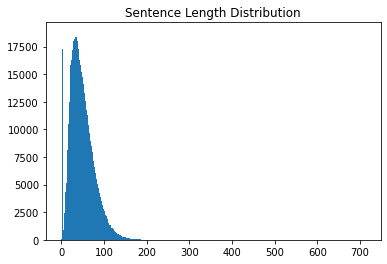

In [35]:
# enc_corpus 통계

min_len = 999
max_len = 0
sum_len = 0


for sen in enc_corpus:
    length = len(str(sen))
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(enc_corpus))

sentence_length = np.zeros((max_len), dtype=int)

#총 max_len의 배열을 만든 후, raw 문장을 돌면서 각 문장별 길이를 sentence_length의 len(sen) 인덱스마다  계속 더해가면서 counting
for sen in enc_corpus:
    sentence_length[len(str(sen))-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [36]:
dec_corpus_test

0                          <jj> 그니까 거기 그 사진 찍는아니 주상절리 마냥
1                                            <jj> 집에 이시믄
2                <jj> 먹어지믄 취하잖아 겅하 믄이 취하면 한이 있네 사람이 왜 이게
3                                         <jj> 그렇지 겅하겠주게
4              <jj> 나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줜
                             ...                        
495    <gs> 뭐 두 분 쓰시는 게 없어서 뭐 안정적인 건지 살 잘 얘기를 안 하시더라고...
496                 <gs> 잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다
497                                     <gs> 아니 잘 안 맞지 닌
498                <gs> 진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테
499    <gs> 바퀴벌레가 방역을 해도 기어나와 가지고 이제는 쪼끔 마음이 쫌 나아지긴 했...
Name: reg_dial, Length: 500, dtype: object

문장의 최단 길이: 4
문장의 최장 길이: 221
문장의 평균 길이: 31


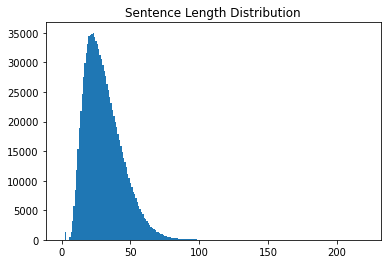

In [37]:
# dec_corpus 통계

min_len = 999
max_len = 0
sum_len = 0


for sen in dec_corpus:
    length = len(str(sen))
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(dec_corpus))

sentence_length = np.zeros((max_len), dtype=int)

#총 max_len의 배열을 만든 후, raw 문장을 돌면서 각 문장별 길이를 sentence_length의 len(sen) 인덱스마다  계속 더해가면서 counting
for sen in dec_corpus:
    sentence_length[len(str(sen))-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [38]:
len(enc_corpus)

1065918

In [39]:
len(dec_corpus)

1065918

In [40]:
# #훈련 및 테스트셋 분리
# enc_corpus=enc_corpus[:-100]
# enc_corpus_test = enc_corpus[-100:]
# dec_corpus=dec_corpus[:-100]
# dec_corpus_test = dec_corpus[-100:]

In [41]:
# print(enc_corpus.shape)
# print(enc_corpus_test.shape)
# print(dec_corpus.shape)
# print(dec_corpus_test.shape)

# Step 2. 데이터 정제 및 토큰화

In [42]:
# Train 데이터 정제 및 토큰화
def clean_corpus(enc_corpus, dec_corpus):

    assert len(enc_corpus) == len(dec_corpus) # enc_corpus, dec_corpus가 같은 갯수라는 것을 검증받기 위해 적용

    cleaned_corpus = list(set(zip(enc_corpus, dec_corpus)))  # 중복된 데이터 제거
    
    return cleaned_corpus

cleaned_corpus = clean_corpus(enc_corpus, dec_corpus)
len(cleaned_corpus)

1065270

In [43]:
cleaned_corpus

[('i think he s answering the question with a smile .',
  '<jj> 웃음 골랑 대답 하는 거 닮아'),
 ('you told me to be like a family and you gave me something else .',
  '<kw> 아버님은 한 가족처럼 지내라시면서 뭘 또 따치 준 빌 .'),
 ('my mom used to have a movie called shosok exodus .',
  '<jd> 우리 엄마가 그 에전에 쇼생크탈출이라고 영화 있어 .'),
 ('where are you ?', '<jd> 어디여'),
 ('so now when you drive uh when you get a lead on the road when the front car hits brayi',
  '<gs> 그래서 인자 운전 면 어 도로 연수를 받을 때 앞차가 브레이키를 밟으먼'),
 ('there are times when housework and room cleaning are all done so i am also sorry',
  '<jd> 집안일 막 방 청소 그런 거 아예 싹 다 끝내 버리는 그런 때가 있당께 나도 .'),
 ('so the next time you re married and you re living with me',
  '<jd> 그니까 다음에는 이제 결혼하고 같이 살면은 니가 스트레칭 할 때 나보고'),
 ('so ive never ridden a bus before', '<kw> 그니까 나는 한 번도 탄 적이 없어 거 가가지고'),
 ('i couldnt do it very xxx because the wind was too strong', None),
 ('ans explaining each of them from afar shes a little nasty',
  '<gs> 또 멀리서 걔네 하나하나 설명해주면서 막 쟤는 쫌 성격이 고약하고'),
 ('says the flower 

In [44]:
# <PAD> : 0 / <BOS> : 1 / <EOS> : 2 / <UNK> : 3
# <jj> : 4 / <jd> : 5 / <gs> : 6 / <cc> : 7 / <kw> : 8

# Sentencepiece를 활용하여 학습한 tokenizer를 생성
def generate_tokenizer(corpus, vocab_size, lang="en", pad_id=0, bos_id=1, eos_id=2, unk_id=3):

    temp_file = os.getenv('HOME') + f'/aiffel/aiffelthon/corpus_{lang}.txt'     # corpus를 받아 txt파일로 저장
    
    with open(temp_file, 'w') as f:
        for row in corpus:
            f.write(str(row) + '\n')
    
    # Sentencepiece를 이용해 
    spm.SentencePieceTrainer.Train(
        f'--input={temp_file} --model_type=bpe --pad_id={pad_id} --bos_id={bos_id} --eos_id={eos_id} \
        --unk_id={unk_id} --model_prefix=spm{lang}_test --vocab_size={vocab_size} \
        --user_defined_symbols=<jj>,<jd>,<gs>,<cc>,<kw> --remove_extra_whitespaces=false'   # model_r0
    )
    tokenizer = spm.SentencePieceProcessor()
    tokenizer.Load(f'spm{lang}_test.model') # model_r1

    return tokenizer

In [45]:
SRC_VOCAB_SIZE = TGT_VOCAB_SIZE = 4009

enc_corpus = []
dec_corpus = []

for pair in cleaned_corpus:
    e, d = pair[0], pair[1]
    # enc, dec 분리
    enc_corpus.append(e)
    dec_corpus.append(d)

#     enc_corpus.append(preprocess_sentence(e))
#     dec_corpus.append(preprocess_sentence(d))

enc_tokenizer = generate_tokenizer(enc_corpus, SRC_VOCAB_SIZE, "enc")
dec_tokenizer = generate_tokenizer(dec_corpus, TGT_VOCAB_SIZE, "dec")
dec_tokenizer.set_encode_extra_options("bos:eos")

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/aiffelthon/corpus_enc.txt --model_type=bpe --pad_id=0 --bos_id=1 --eos_id=2         --unk_id=3 --model_prefix=spmenc_test --vocab_size=4009         --user_defined_symbols=<jj>,<jd>,<gs>,<cc>,<kw> --remove_extra_whitespaces=false
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/aiffelthon/corpus_enc.txt
  input_format: 
  model_prefix: spmenc_test
  model_type: BPE
  vocab_size: 4009
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  user_defined_symbols: <jj>
  user_defined_symbols:

True

In [46]:
enc_corpus

['i think he s answering the question with a smile .',
 'you told me to be like a family and you gave me something else .',
 'my mom used to have a movie called shosok exodus .',
 'where are you ?',
 'so now when you drive uh when you get a lead on the road when the front car hits brayi',
 'there are times when housework and room cleaning are all done so i am also sorry',
 'so the next time you re married and you re living with me',
 'so ive never ridden a bus before',
 'i couldnt do it very xxx because the wind was too strong',
 'ans explaining each of them from afar shes a little nasty',
 'says the flower shop is about to check out the one day class .',
 'but i m so dizzy .',
 'isnt it so funny',
 'you didn t think so either did you ?',
 'itid not been that hard but now i have to stand up so its a little hard to stand',
 'i used to take a man s fist back in the day .',
 'it s not because i don t want to sell it cheaper it s because there s a lot of marjin left over .',
 'the morning 

In [47]:
dec_corpus

['<jj> 웃음 골랑 대답 하는 거 닮아',
 '<kw> 아버님은 한 가족처럼 지내라시면서 뭘 또 따치 준 빌 .',
 '<jd> 우리 엄마가 그 에전에 쇼생크탈출이라고 영화 있어 .',
 '<jd> 어디여',
 '<gs> 그래서 인자 운전 면 어 도로 연수를 받을 때 앞차가 브레이키를 밟으먼',
 '<jd> 집안일 막 방 청소 그런 거 아예 싹 다 끝내 버리는 그런 때가 있당께 나도 .',
 '<jd> 그니까 다음에는 이제 결혼하고 같이 살면은 니가 스트레칭 할 때 나보고',
 '<kw> 그니까 나는 한 번도 탄 적이 없어 거 가가지고',
 None,
 '<gs> 또 멀리서 걔네 하나하나 설명해주면서 막 쟤는 쫌 성격이 고약하고',
 '<jj> 이름 이 이제 꽃집 그거 원데이 클래스 알아본댄 .',
 '<kw> 근데 나 너무 어지러와요 .',
 '<cc> 겁나 웃기지 않어 ?',
 '<kw> 니도 그래 생각한 거 아니지 ?',
 '<cc> 별로 힘들었던 건 없고 지금은 막 계속 서 있어야 되니께 그게 좀 힘들드라고 서 있는 게',
 '<jj> 나 지네 옛날에 맨 맨 주먹으로 잡은 적이 있네 .',
 '<kw> 더 싸게 팔기 싫어서 그런 거 아이야 이게 마진이 많이 남으니까 이게 마진 마이 남잖아 .',
 '<kw> 새벅 공기가 아스스해 .',
 '<kw> 훨썩 보기 좋단 뜻이이까 오해하지 말아요 .',
 '<kw> 손님한테 쓸데 없는 거는 물어보라고 왜 그러는겨 ?',
 '<jj> 연 실에 풀칠해영 거 유리 꼬루를 다 맥영',
 '<kw> 살다 벨일이 다 있어 .',
 '<jd> 근데 인제 부부 관계가 보면',
 '<jj> 아 근데 걔 연락은 너 그때 상호명친구 핸 안 핸',
 '<jj> 그런 자존심은 다 버려 버리랜',
 '<gs> 그 음 다른 분과 함께 가면서 재밌었던 그런 이야기를 쫌 해 주시면 좋겠어요 .',
 '<jd> 그서 그 미용실로 가셨더라고 근데',
 '<kw> 이 방에 세들어 사는 이는 운제 나갑니까 ?',
 '<gs> 그래서 그걸로 쫌 

In [48]:
len(enc_corpus)

1065270

In [49]:
len(dec_corpus)

1065270

In [50]:
print(enc_tokenizer.EncodeAsPieces(enc_corpus[200]))

['▁yeah', '▁well', '▁if', '▁there', '▁s', '▁a', '▁fire', '▁there', '▁s', '▁actually', '▁people', '▁there', '▁.']


In [51]:
print(dec_tokenizer.EncodeAsPieces(dec_corpus[200]))

['<s>', '▁', '<gs>', '▁그', '죠', '▁뭐', '▁그냥', '▁불', '나', '면은', '▁사실', '▁뭐', '▁다', '▁사람들도', '▁있', '기도', '▁하고', '▁뭐', '</s>']


In [52]:
print(enc_tokenizer.EncodeAsIds(enc_corpus[900]))

[40, 576, 294, 40, 576, 294, 29, 87, 312, 634]


In [53]:
print(dec_tokenizer.EncodeAsIds(dec_corpus[900]))

[1, 2521, 5, 226, 61, 1899, 168, 2760, 2742, 2885, 61, 346, 356, 3015, 2646, 13, 2183, 2]


In [54]:
# 토크나이저를 활용해 토큰의 길이가 >5 이상인 데이터를 선별하여 src_corpus 와 tgt_corpus 를 각각 구축하고, 텐서 enc_train 과 dec_train 으로 변환
src_corpus = [] #영어
tgt_corpus = [] #사투리

assert len(enc_corpus) == len(dec_corpus)

# 토큰의 길이가 xxx 이하인 문장만 남깁니다. 
for idx in tqdm(range(len(enc_corpus))):
    src = enc_tokenizer.EncodeAsIds(str(enc_corpus[idx]))
    tgt = dec_tokenizer.EncodeAsIds(str(dec_corpus[idx]))
    
    if len(src) >= 5 : 
        src_corpus.append(src)
        tgt_corpus.append(tgt)

# 패딩처리를 완료하여 학습용 데이터를 완성합니다. 
enc_train = tf.keras.preprocessing.sequence.pad_sequences(src_corpus, padding='post')
dec_train = tf.keras.preprocessing.sequence.pad_sequences(tgt_corpus, padding='post')

  0%|          | 0/1065270 [00:00<?, ?it/s]

In [55]:
# # 훈련 데이터와 검증 데이터로 분리하기
# enc_train, enc_val, dec_train, dec_val = train_test_split(enc_data, dec_data, test_size=0.05)

In [56]:
# enc, dec 의 seq_length는 달라도 상관없음.
print(enc_train.shape)
print(dec_train.shape)
# print(enc_val.shape)
# print(dec_val.shape)

(999660, 168)
(999660, 117)


In [57]:
dec_tokenizer.encode('<jd>')

[1, 2521, 5, 2]

# Step 3. 모델설계

## Positional Encoding

In [58]:
# pos - 단어가 위치한 Time-step(각각의 토큰의 위치정보값이며 정수값을 의미)
# d_model - 모델의 Embedding 차원 수
# i - Encoding차원의 index

def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i)/d_model)  # np.power(a,b) > a^b(제곱)
    
    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]
    
    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])
    
    # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])
    
    return sinusoid_table

## Multi-Head Attention

In [59]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model
        
        self.depth = d_model // self.num_heads
        
        self.W_q = tf.keras.layers.Dense(d_model)  # Linear Layer
        self.W_k = tf.keras.layers.Dense(d_model)
        self.W_v = tf.keras.layers.Dense(d_model)
        
        self.linear = tf.keras.layers.Dense(d_model)
        
    def scaled_dot_product_attention(self, Q, K, V, mask):
        d_k = tf.cast(K.shape[-1], tf.float32)
        
        # Scaled QK 값 구하기
        QK = tf.matmul(Q, K, transpose_b=True)
        scaled_qk = QK / tf.math.sqrt(d_k)
        
        if mask is not None:
            scaled_qk += (mask * -1e9)
        
        # 1. Attention Weights 값 구하기 -> attentions
        attentions = tf.nn.softmax(scaled_qk, axis=-1)
        # 2. Attention 값을 V에 곱하기 -> out
        out = tf.matmul(attentions, V)
        return out, attentions
    
    def split_heads(self, x):
        """
        Embedding된 입력을 head의 수로 분할하는 함수
        
        x: [ batch x length x emb ]
        return: [ batch x length x heads x self.depth ]
        """
        bsz = x.shape[0]
        split_x = tf.reshape(x, (bsz, -1, self.num_heads, self.depth))
        split_x = tf.transpose(split_x, perm=[0, 2, 1, 3])
        return split_x
    
    def combine_heads(self, x):
        """
        분할된 Embedding을 하나로 결합하는 함수
        
        x: [ batch x length x heads x self.depth ]
        return: [ batch x length x emb ]
        """
        bsz = x.shape[0]
        combined_x = tf.transpose(x, perm=[0, 2, 1, 3])
        combined_x = tf.reshape(combined_x, (bsz, -1, self.d_model))
        return combined_x
    
    def call(self, Q, K, V, mask):
        """
        Step 1: Linear_in(Q, K, V) -> WQ, WK, WV
        Step 2: Split Heads(WQ, WK, WV) -> WQ_split, WK_split, WV_split
        Step 3: Scaled Dot Product Attention(WQ_split, WK_split, WV_split)
                 -> out, attention_weights
        Step 4: Combine Heads(out) -> out
        Step 5: Linear_out(out) -> out
        """
        WQ = self.W_q(Q)
        WK = self.W_k(K)
        WV = self.W_v(V)
        
        WQ_splits = self.split_heads(WQ)
        WK_splits = self.split_heads(WK)
        WV_splits = self.split_heads(WV)
        
        out, attention_weights = self.scaled_dot_product_attention(
            WQ_splits, WK_splits, WV_splits, mask
        )
        
        out = self.combine_heads(out)
        out = self.linear(out)
        
        return out, attention_weights

## Position-wise Feed-Forward Network

In [60]:
class PoswiseFeedForwardNet(tf.keras.layers.Layer):
    def __init__(self, d_model, d_ff):
        super(PoswiseFeedForwardNet, self).__init__()
        self.w_1 = tf.keras.layers.Dense(d_ff, activation='relu')
        self.w_2 = tf.keras.layers.Dense(d_model)

    def call(self, x):
        out = self.w_1(x)
        out = self.w_2(out)
            
        return out

print("슝=3")

슝=3


## Encoder 레이어 구현하기

In [61]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, n_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.enc_self_attn = MultiHeadAttention(d_model, n_heads)
        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)
        
        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        
        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        # Multi-Head Attention
        residual = x
        out = self.norm_1(x)
        out, enc_attn = self.enc_self_attn(out, out, out, mask)
        out = self.do(out)
        out += residual*1 
        
        # Position-Wise Feed Forward Network
        residual = out
        out = self.norm_2(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual*1 
        
        return out, enc_attn

## Decoder 레이어 구현하기

In [62]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()

        self.dec_self_attn = MultiHeadAttention(d_model, num_heads)
        self.enc_dec_attn = MultiHeadAttention(d_model, num_heads)

        self.ffn = PoswiseFeedForwardNet(d_model, d_ff)

        self.norm_1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.norm_3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, enc_out, causality_mask, padding_mask):
        # Masked Multi-Head Attention
        residual = x
        out = self.norm_1(x)
        #out, dec_attn = self.dec_self_attn(out, out, out, causality_mask)
        out, dec_attn = self.dec_self_attn(out, out, out, padding_mask)
        out = self.do(out)
        out += residual
        
        # Multi-Head Attention
        residual = out
        out = self.norm_2(out)
        #out, dec_enc_attn = self.enc_dec_attn(out, enc_out, enc_out, padding_mask)
        out, dec_enc_attn = self.enc_dec_attn(out, enc_out, enc_out, causality_mask)
        out = self.do(out)
        out += residual

        # Position-Wise Feed Forward Network
        residual = out
        out = self.norm_3(out)
        out = self.ffn(out)
        out = self.do(out)
        out += residual

        return out, dec_attn, dec_enc_attn

## Encoder와 Decoder 클래스를 정의
EncodeLayer 와 DecoderLayer 를 모두 정의했으니 이를 조립하는 것은 어렵지 않겠죠? 이를 이용해 Encoder와 Decoder 클래스를 정의합니다.

In [63]:
class Encoder(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
        super(Encoder, self).__init__()
        self.n_layers = n_layers
        self.enc_layers = [EncoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)]
        self.do = tf.keras.layers.Dropout(dropout)
        
    def call(self, x, mask):
        out = x
        enc_attns = list()
        for i in range(self.n_layers):
            out, enc_attn = self.enc_layers[i](out, mask)
            enc_attns.append(enc_attn)
            
        return out, enc_attns

In [64]:
class Decoder(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, dropout):
        super(Decoder, self).__init__()
        self.n_layers = n_layers
        self.dec_layers = [DecoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)]
        
    def call(self, x, enc_out, causality_mask, padding_mask):
        out = x
        dec_attns = list()
        dec_enc_attns = list()
        for i in range(self.n_layers):
            out, dec_attn, dec_enc_attn = self.dec_layers[i](out, enc_out, causality_mask, padding_mask)
            dec_attns.append(dec_attn)
            dec_enc_attns.append(dec_enc_attn)
        
        return out, dec_attns, dec_enc_attns

## Transformer 완성하기


In [65]:
class Transformer(tf.keras.Model):
    def __init__(self, n_layers, d_model, n_heads, d_ff, src_vocab_size, tgt_vocab_size,
                 pos_len, dropout=0.2, shared=True):
        super(Transformer, self).__init__()
        self.d_model = tf.cast(d_model, tf.float32)
        
        # 1. Embedding Layer 정의
        self.enc_emb = tf.keras.layers.Embedding(src_vocab_size, d_model)
        self.dec_emb = tf.keras.layers.Embedding(tgt_vocab_size, d_model)
        
        # 2. Positional Encoding 정의
        self.pos_encoding = positional_encoding(pos_len, d_model)
        # 6. Dropout 정의
        self.do = tf.keras.layers.Dropout(dropout)
        
        # 3. Encoder / Decoder 정의
        self.encoder = Encoder(n_layers, d_model, n_heads, d_ff, dropout)
        self.decoder = Decoder(n_layers, d_model, n_heads, d_ff, dropout)
        
        # 4. Output Linear 정의
        self.fc = tf.keras.layers.Dense(tgt_vocab_size)
        
        # 5. Shared Weights
        self.shared = shared
        
        if shared:
            self.fc.set_weights(tf.transpose(self.dec_emb.weights))
        
        
    def embedding(self, emb, x):
        """
        입력된 정수 배열을 Embedding + Pos Encoding
        + Shared일 경우 Scaling 작업 포함

        x: [ batch x length ]
        return: [ batch x length x emb ]
        """
        seq_len = x.shape[1]
        out = emb(x)
        
        if self.shared:
            out *= tf.math.sqrt(self.d_model)
        
        out += self.pos_encoding[np.newaxis, ...][:, :seq_len, :]
        out = self.do(out)
        
        return out
    
    def call(self, enc_in, dec_in, enc_mask, causality_mask, dec_mask):
        # Step 1: Embedding(enc_in, dec_in) -> enc_in, dec_in
        enc_in = self.embedding(self.enc_emb, enc_in)
        dec_in = self.embedding(self.dec_emb, dec_in)
        
        # Step 2: Encoder(enc_in, enc_mask) -> enc_out, enc_attns
        enc_out, enc_attns = self.encoder(enc_in, enc_mask)

        # Step 3: Decoder(dec_in, enc_out, mask) -> dec_out, dec_attns, dec_enc_attns
        dec_out, dec_attns, dec_enc_attns = self.decoder(dec_in, enc_out, causality_mask, dec_mask)
        
        # Step 4: Out Linear(dec_out) -> logits
        logits = self.fc(dec_out)
        
        return logits, enc_attns, dec_attns, dec_enc_attns
    

## Mask

In [66]:
# Attention을 할 때에 <PAD> 토큰에도 Attention을 주는 것을 방지해 주는 역할
def generate_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

def generate_causality_mask(src_len, tgt_len):
    mask = 1 - np.cumsum(np.eye(src_len, tgt_len), 0)
    return tf.cast(mask, tf.float32)

def generate_masks(src, tgt):
    enc_mask = generate_padding_mask(src)
    dec_mask = generate_padding_mask(tgt)

    dec_enc_causality_mask = generate_causality_mask(tgt.shape[1], src.shape[1])
    dec_enc_mask = tf.maximum(enc_mask, dec_enc_causality_mask)

    dec_causality_mask = generate_causality_mask(tgt.shape[1], tgt.shape[1])
    dec_mask = tf.maximum(dec_mask, dec_causality_mask)

    return enc_mask, dec_enc_mask, dec_mask

# Step 4. 훈련하기

In [67]:
transformer = Transformer(
    n_layers=2,
    d_model=512,
    n_heads=8,
    d_ff=2048,
    src_vocab_size=SRC_VOCAB_SIZE,
    tgt_vocab_size=TGT_VOCAB_SIZE,
    pos_len=200,
    dropout=0.2,
    shared=True
)

##  Learning Rate Scheduler를 선언하고, 이를 포함하는 Adam Optimizer를 선언

In [68]:
class LearningRateScheduler(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(LearningRateScheduler, self).__init__()
        self.d_model = d_model
        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = step ** -0.5
        arg2 = step * (self.warmup_steps ** -1.5)
        
        return (self.d_model ** -0.5) * tf.math.minimum(arg1, arg2)

In [69]:
learning_rate = LearningRateScheduler(512)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

## Loss 함수를 정의


In [70]:
# Loss 함수 정의
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    # Masking 되지 않은 입력의 개수로 Scaling하는 과정
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

## train_step 함수를 정의


In [71]:
@tf.function()
def train_step(src, tgt, model, optimizer):
    gold = tgt[:, 1:]
        
    enc_mask, dec_enc_mask, dec_mask = generate_masks(src, tgt)

    # 계산된 loss에 tf.GradientTape()를 적용해 학습을 진행합니다.
    with tf.GradientTape() as tape:
        predictions, enc_attns, dec_attns, dec_enc_attns = model(src, tgt, enc_mask, dec_enc_mask, dec_mask)
        loss = loss_function(gold, predictions[:, :-1])

    # 최종적으로 optimizer.apply_gradients()가 사용됩니다. 
    gradients = tape.gradient(loss, model.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    return loss, enc_attns, dec_attns, dec_enc_attns

In [72]:
directory = os.getenv('HOME') + '/aiffel/aiffelthon/'

In [74]:
print(os.getcwd())
os.listdir(directory)

/aiffel/aiffel/aiffelthon


['.ipynb_checkpoints',
 'corpus_enc.txt',
 '[Aiffelthon]_SaTuRi_BaseModelTR_Dial_temp.ipynb',
 'data',
 'dataset_full_v1.csv',
 'corpus_dec.txt',
 '[Aiffelthon]_SaTuRi_BaseModelTR_Dial.ipynb',
 '[Aiffelthon]_SaTuRi_BaseModelTR.ipynb',
 'spmenc_test.vocab',
 'datset_full_raw_needs_translation_0221_v2.csv',
 'spmenc_test.model',
 'spmdec_test.model',
 'dataset_145000',
 'spmdec_test.vocab']

In [75]:
# ckpt = tf.train.Checkpoint(step = tf.Variable(1), optimizer = optimizer , transformer = transformer)
# manager = tf.train.CheckpointManager(ckpt, '/aiffel/aiffel/aiffelthon/tf_ckpts_gd12_test',max_to_keep=1)

ckpt = tf.train.Checkpoint(step = tf.Variable(1), optimizer = optimizer , transformer = transformer)
manager = tf.train.CheckpointManager(ckpt, directory +'tf_ckpts_gd12_test',max_to_keep=3)

## Attention 시각화 함수

In [76]:
# Attention 시각화 함수
def visualize_attention(src, tgt, enc_attns, dec_attns, dec_enc_attns):
    def draw(data, ax, x="auto", y="auto"):
        import seaborn
        seaborn.heatmap(data, 
                        square=True,
                        vmin=0.0, vmax=1.0, 
                        cbar=False, ax=ax,
                        xticklabels=x,
                        yticklabels=y)
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Encoder Layer", layer + 1)
        for h in range(4):
            draw(enc_attns[layer][0, h, :len(src), :len(src)], axs[h], src, src)
        plt.show()
        
    for layer in range(0, 2, 1):
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        print("Decoder Self Layer", layer+1)
        for h in range(4):
            draw(dec_attns[layer][0, h, :len(tgt), :len(tgt)], axs[h], tgt, tgt)
        plt.show()

        print("Decoder Src Layer", layer+1)
        fig, axs = plt.subplots(1, 4, figsize=(20, 10))
        for h in range(4):
            draw(dec_enc_attns[layer][0, h, :len(tgt), :len(src)], axs[h], src, tgt)
        plt.show()

## 번역생성함수

In [77]:
# 번역 생성 함수
def evaluate(sentence, model, reg, src_tokenizer, tgt_tokenizer):
    sentence = preprocess_sentence(sentence)
    pieces = src_tokenizer.encode_as_pieces(sentence)
    tokens = src_tokenizer.encode_as_ids(sentence)

    _input = tf.keras.preprocessing.sequence.pad_sequences([tokens], maxlen=enc_train.shape[-1], padding='post')

    ids = []

    #     output = tf.expand_dims([tgt_tokenizer.bos_id()], 0)    
    # jj > 4, jd > 5, gs > 6 , cc > 7 , kw > 8
    output = tf.expand_dims([tgt_tokenizer.bos_id(), reg], 0) # reg포함
    for i in range(dec_train.shape[-1]):
        enc_padding_mask, combined_mask, dec_padding_mask = generate_masks(_input, output)
        

        predictions, enc_attns, dec_attns, dec_enc_attns = model(_input, output, enc_padding_mask, combined_mask, dec_padding_mask)
        
        predicted_id = tf.argmax(tf.math.softmax(predictions, axis=-1)[0, -1]).numpy().item()
        if tgt_tokenizer.eos_id() == predicted_id:
            result = tgt_tokenizer.decode_ids(ids)
            return pieces, result, enc_attns, dec_attns, dec_enc_attns

        ids.append(predicted_id)
        output = tf.concat([output, tf.expand_dims([predicted_id], 0)], axis=-1)
    result = tgt_tokenizer.decode_ids(ids)
    return pieces, result, enc_attns, dec_attns, dec_enc_attns

In [78]:
# 번역 생성 및 Attention 시각화 결합
def translate(sentence, model, reg, src_tokenizer, tgt_tokenizer, plot_attention=False):
    pieces, result, enc_attns, dec_attns, dec_enc_attns = evaluate(sentence, model, reg, src_tokenizer, tgt_tokenizer)
    
    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))

    if plot_attention:
        visualize_attention(pieces, result.split(), enc_attns, dec_attns, dec_enc_attns)
  
    return result

In [79]:
examples = [
    "How was your day? I was the best.",
    "Take your time, please.",
    "I’m about to leave. Please hold for a moment.",
    "Have you heard of it?"
]

## 학습

In [81]:
# 학습
EPOCHS = 3
BATCH_SIZE = 64

def train_and_checkpoint(transformer, manager, EPOCHS):
    ckpt.restore(manager.latest_checkpoint)
    if manager.latest_checkpoint:
        print("Restored from {}".format(manager.latest_checkpoint))
    
    else:
        print("Initializing from scratch.")


    for epoch in range(EPOCHS):
        total_loss = 0

        idx_list = list(range(0, enc_train.shape[0], BATCH_SIZE))
        random.shuffle(idx_list)
        t = tqdm(idx_list)

        for (batch, idx) in enumerate(t):
            batch_loss, enc_attns, dec_attns, dec_enc_attns = train_step(enc_train[idx:idx+BATCH_SIZE],
                                                                         dec_train[idx:idx+BATCH_SIZE],
                                                                         transformer,
                                                                         optimizer)

            total_loss += batch_loss

            t.set_description_str('Epoch %2d' % (epoch + 1))
            t.set_postfix_str('Loss %.4f' % (total_loss.numpy() / (batch + 1)))
      
      
#         # 매 Epoch 마다 제시된 예문에 대한 번역 생성
#         for reg in [4,5,6,7,8]:
#             translate('I’m about to leave. Please hold for a moment', transformer, reg, enc_tokenizer, dec_tokenizer)
            


        save_path = manager.save()
        print("Saved checkpoint for step {}: {}".format(int(ckpt.step), save_path))

In [82]:
train_and_checkpoint(transformer, manager, EPOCHS)

Initializing from scratch.


  0%|          | 0/15620 [00:00<?, ?it/s]

Saved checkpoint for step 1: /aiffel/aiffel/aiffelthon/tf_ckpts_gd12_test/ckpt-1


  0%|          | 0/15620 [00:00<?, ?it/s]

Saved checkpoint for step 1: /aiffel/aiffel/aiffelthon/tf_ckpts_gd12_test/ckpt-2


  0%|          | 0/15620 [00:00<?, ?it/s]

Saved checkpoint for step 1: /aiffel/aiffel/aiffelthon/tf_ckpts_gd12_test/ckpt-3


In [83]:
print(type(enc_corpus_test))
print(type(dec_corpus_test))
print(type(enc_corpus_test_jj))
print(type(dec_corpus_test_jj))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [85]:
# jj > 4, jd > 5, gs > 6 , cc > 7 , kw > 8

reg = {4 : '제주도', 5 : '전라도', 6 :'경상도',7:'충청도', 8:'강원도'}

for i in range(4,9) :
    print(f'{reg[i]} 사투리 :')    
    translate('what are you doing?',transformer, i, enc_tokenizer, dec_tokenizer)
    print()

제주도 사투리 :
Input: what are you doing?
Predicted translation: 뭐하맨 ?

전라도 사투리 :
Input: what are you doing?
Predicted translation: 뭐 하냐 .

경상도 사투리 :
Input: what are you doing?
Predicted translation: 뭐고 뭐고 뭐고

충청도 사투리 :
Input: what are you doing?
Predicted translation: 뭐여

강원도 사투리 :
Input: what are you doing?
Predicted translation: 지굼 뭐하는 거예요 ?



In [87]:
# jj > 4, jd > 5, gs > 6 , cc > 7 , kw > 8

reg = {4 : '제주도', 5 : '전라도', 6 :'경상도',7:'충청도', 8:'강원도'}

for i in range(4,9) :
    print(f'{reg[i]} 사투리 :')    
    translate(enc_corpus_test[2],transformer, i, enc_tokenizer, dec_tokenizer)
    print()


제주도 사투리 :
Input: you re eating and getting drunk and if you re drunk there s only one person .
Predicted translation: 술 먹고 취해부난 취해불믄 술만 먹고

전라도 사투리 :
Input: you re eating and getting drunk and if you re drunk there s only one person .
Predicted translation: 술 먹고 취해갖고 취해갖고 술 먹고 취해불믄 한 명밖에 없제 .

경상도 사투리 :
Input: you re eating and getting drunk and if you re drunk there s only one person .
Predicted translation: 먹는 거 먹고 취하고 취하면 취하고 술만 먹고

충청도 사투리 :
Input: you re eating and getting drunk and if you re drunk there s only one person .
Predicted translation: 술 먹고 취해 갖고 취해 갖고 술 먹고 술만 먹고 있으믄 한 명만 있어 .

강원도 사투리 :
Input: you re eating and getting drunk and if you re drunk there s only one person .
Predicted translation: 술 먹고 취해 술 먹고 술만 먹고 술만 먹고 술만 먹으문 한 사램만 있어 .



# Step 5. 평가

In [89]:
enc_corpus_test

0      so youre not taking that picture there are you...
1                                     if you are at home
2      you re eating and getting drunk and if you re ...
3                                thats right ill do that
4                                                   None
                             ...                        
495    im worried about whether its stable or not bec...
496    when you hit well or did this you re all just ...
497                            no it doesnt fit well you
498                            i m so sorry about this .
499    i fot it out even if the cockroaches crawled o...
Name: eng, Length: 500, dtype: object

In [90]:
dec_corpus_test

0                          <jj> 그니까 거기 그 사진 찍는아니 주상절리 마냥
1                                            <jj> 집에 이시믄
2                <jj> 먹어지믄 취하잖아 겅하 믄이 취하면 한이 있네 사람이 왜 이게
3                                         <jj> 그렇지 겅하겠주게
4              <jj> 나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줜
                             ...                        
495    <gs> 뭐 두 분 쓰시는 게 없어서 뭐 안정적인 건지 살 잘 얘기를 안 하시더라고...
496                 <gs> 잘 치거나 이렇게 했을 때 다 그냥 이케 손 한 번씩 다
497                                     <gs> 아니 잘 안 맞지 닌
498                <gs> 진짜 너무 이거 쪼끔 쪼끔 미안하기도 하고 다른 사람들한테
499    <gs> 바퀴벌레가 방역을 해도 기어나와 가지고 이제는 쪼끔 마음이 쫌 나아지긴 했...
Name: reg_dial, Length: 500, dtype: object

In [91]:
dec_tokenizer.encode_as_ids(dec_corpus_test_jj.iloc[0])

[1,
 2521,
 4,
 120,
 154,
 9,
 832,
 702,
 2525,
 2528,
 2539,
 84,
 2610,
 2827,
 2547,
 72,
 2633,
 2]

In [92]:
enc_tokenizer.encode_as_ids(enc_corpus_test_jj.iloc[0])

[43, 357, 138, 1061, 48, 922, 95, 115, 27, 132, 621, 1610, 59, 455, 2285]

In [93]:
enc_corpus_test_jj.reset_index(drop=True)

0     so youre not taking that picture there are you...
1                                    if you are at home
2     you re eating and getting drunk and if you re ...
3                               thats right ill do that
4                                                  None
                            ...                        
95    it is possible to see it inside what should i ...
96             tell give two bowls of soup to my mother
97            my motherinlaw is only a hundred or sixty
98              i have something to eat but i cooked it
99    i m going to make money . i m going to spend it .
Name: eng, Length: 100, dtype: object

In [95]:
dec_corpus_test_jj.reset_index(drop=True)

0                 <jj> 그니까 거기 그 사진 찍는아니 주상절리 마냥
1                                   <jj> 집에 이시믄
2       <jj> 먹어지믄 취하잖아 겅하 믄이 취하면 한이 있네 사람이 왜 이게
3                                <jj> 그렇지 겅하겠주게
4     <jj> 나 아는사람이라고 해서 십만 원 더 지원해서 이십만 원 지원해 줜
                        ...                    
95                   <jj> 안에 안보여줘도 가능하나 어떵 안 호여
96              <jj> 가재 어멍한테 국 두 그릇 줘 주랜해야 돼여 .
97                 <jj> 우리 시어머니가 키가이 백오십 밖에 안돼예
98                      <jj> 먹을꺼 이신디 콕콕 해난디 그런디
99     <jj> 이추룩 돈 벌어렁 쓸건디 쓸 건데 돈 벌엉 쓸건디 쓸 건데 허명
Name: reg_dial, Length: 100, dtype: object

In [97]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction

def eval_bleu_single(model, reg, src_sentence, tgt_sentence, enc_tokenizer, dec_tokenizer, verbose=True):
    src_tokens = enc_tokenizer.encode_as_ids(src_sentence)
    tgt_tokens = dec_tokenizer.encode_as_ids(tgt_sentence)

    if (len(src_tokens) > 100): return None
    if (len(tgt_tokens) > 100): return None

    reference = tgt_sentence.split()
    candidate = translate(src_sentence, model, reg, enc_tokenizer, dec_tokenizer).split()

    score = sentence_bleu([reference], candidate,
                          smoothing_function=SmoothingFunction().method1)

    if verbose:
        print("Source Sentence: ", src_sentence)
        print("Model Prediction: ", candidate)
        print("Real: ", reference)
        print("Score: %lf\n" % score)
        
    return score

In [98]:
# single test (제주도사투리)
test_idx = 70

eval_bleu_single(transformer, 
                 4,
                 enc_corpus_test_jj.iloc[test_idx], 
                 dec_corpus_test_jj.iloc[test_idx], 
                 enc_tokenizer, 
                 dec_tokenizer, 
                 verbose=True)

Input: hey but we did everything do you know
Predicted translation: 야 근데 우리는 다 핸 .
Source Sentence:  hey but we did everything do you know
Model Prediction:  ['야', '근데', '우리는', '다', '핸', '.']
Real:  ['<jj>', '야', '근데', '우리는', '우리가', '다', '했어신디', '알지', '?']
Score: 0.131689



0.13168903966325227

In [99]:
def eval_bleu(model, reg, src_sentences, tgt_sentence, enc_tokenizer, dec_tokenizer, verbose=True):
    total_score = 0.0
    sample_size = len(src_sentences)
    
    for idx in tqdm(range(sample_size)):
        score = eval_bleu_single(model, reg, src_sentences.iloc[idx], tgt_sentence.iloc[idx], enc_tokenizer, dec_tokenizer, verbose)
        if not score: continue
        
        total_score += score
    
    print("Num of Sample:", sample_size)
    print("Total Score:", total_score / sample_size*100)

In [100]:
enc_corpus_test_jj.isnull()

0     False
1     False
2     False
3     False
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: eng, Length: 100, dtype: bool

In [116]:
# Null data 제거
enc_corpus_test_jj=enc_corpus_test_jj.dropna(axis=0)
enc_corpus_test_jd=enc_corpus_test_jd.dropna(axis=0)
enc_corpus_test_gs=enc_corpus_test_gs.dropna(axis=0)
enc_corpus_test_cc=enc_corpus_test_cc.dropna(axis=0)
enc_corpus_test_kw=enc_corpus_test_kw.dropna(axis=0)

dec_corpus_test_jj=dec_corpus_test_jj.dropna(axis=0)
dec_corpus_test_jd=dec_corpus_test_jd.dropna(axis=0)
dec_corpus_test_gs=dec_corpus_test_gs.dropna(axis=0)
dec_corpus_test_cc=dec_corpus_test_cc.dropna(axis=0)
dec_corpus_test_kw=dec_corpus_test_kw.dropna(axis=0)

In [102]:
# reg = {4 : '제주도'}
eval_bleu(transformer, 4, enc_corpus_test_jj.iloc[:], dec_corpus_test_jj.iloc[:], enc_tokenizer, dec_tokenizer, verbose=False)

  0%|          | 0/97 [00:00<?, ?it/s]

Input: so youre not taking that picture there are you just columnar joints
Predicted translation: 게난 그 사진 찍는 거 아니네 그냥 동문 열대 ?
Input: if you are at home
Predicted translation: 집에만 이시믄
Input: you re eating and getting drunk and if you re drunk there s only one person .
Predicted translation: 술 먹고 취해부난 취해불믄 술만 먹고
Input: thats right ill do that
Predicted translation: 맞아 겅 하크라
Input: yeah thats how we fought at the entrance of daereungwon
Predicted translation: 어 경행 그렇게 해서 우리 대대전의 입구에 싸원
Input: my mom is sick and has a dizzying head
Predicted translation: 엄마가 아판이 아판이 아판
Input: in therivals also have a hit on that
Predicted translation: 그 판에 그 것도이
Input: and then there was the panic .
Predicted translation: 그다음에 당황이 있언
Input: im going to a parttime job interview tomorrow but this is the problem in chungju
Predicted translation: 나 내일 알바 면회에 가는데 이거 문제라 .
Input: oh this is right away i took the bus to go to school early we were full anyway so its a full bus
Predicted translation: 아 이거 바로바로 버스타고

In [103]:
# reg = {5 : '전라도'}
eval_bleu(transformer, 5, enc_corpus_test_jd.iloc[:], dec_corpus_test_jd.iloc[:], enc_tokenizer, dec_tokenizer, verbose=False)

  0%|          | 0/95 [00:00<?, ?it/s]

Input: then i know how to read the score if i do that
Predicted translation: 그럼 점수는 점수는 어떻게 보냐면은
Input: i mean she s just gonna tell herself she s real and she won t go in there .
Predicted translation: 그니까는 진짜 그냥 진짜 자기만의 말만 하고 안 들어가는 거야 .
Input: first of all i said it was a little bit healthy
Predicted translation: 일단 나는 쫌 건강하다고 해야되나
Input: that s what i think .
Predicted translation: 그런 거 같여 .
Input: to quit smoking
Predicted translation: 담배 끊을라고 담배를 끊는 담배를 끊는 담배
Input: i remember being so big when i was a kid .
Predicted translation: 그 나는 그케 어렸을 때 되게 크고했던 기억이
Input: so in short its a little noisy but we cooperate in the parts we can cooperate with
Predicted translation: 그래서 쫌 짧은 속에서 좀 시끄럽지만 우리가 그 부분에선 인제 그 협조를 해서
Input: it s a place where little particles are used .
Predicted translation: 쫌 참여하는 곳이긴 한데
Input: i asked him to just wash it later and he said he couldnt lower the water in the bathroom because he called the owner after oclock early but he said he was sorry that the water 

In [104]:
#reg = {6 :'경상도'}
eval_bleu(transformer, 6, enc_corpus_test_gs.iloc[:], dec_corpus_test_gs.iloc[:], enc_tokenizer, dec_tokenizer, verbose=False)

  0%|          | 0/97 [00:00<?, ?it/s]

Input: what is the big difference between the korea housing finance corporation and lh
Predicted translation: 그 뭐고 한국 기말고사랑 뭐고 차이가 크고
Input: im just taking off my beginners tshirt so im going to buy it a little lighter
Predicted translation: 초보를 떼고만 하고 있어가지고 초보자들은 쫌 가벼운 걸로 살려고
Input: im going to enjoy it now
Predicted translation: 이제 쫌 즐겨보려고
Input: dont you think its most important not to eat carbohydrates
Predicted translation: 탄수화물을 먹는 게 제일 중요하다고 생각하지 않나 ?
Input: when i was in elementary school or when lee geunho was very popular
Predicted translation: 뭐 초등학교 때나 뭐 이민호가 이호가 되게 유행했었거든요 .
Input: i was curious why he didnt ask for food these days
Predicted translation: 그 음식이 왜 음식을 요즘 안 물어봤는지 쫌 궁금하더라고요 .
Input: sister theres no gray gray churrinking tee that i mentioned earlier right
Predicted translation: 언니 아까 말했던 그 츄리닝 츄리닝 츄리닝이 있다 아이가 ?
Input: the past which shows the facts as it is and me it was a little uncomfortable for me
Predicted translation: 그 옛날에는 그 사실을 보여주는 게 저랑 저랑 쫌 불편했는데
Inp

In [105]:
#reg = {7:'충청도'}
eval_bleu(transformer, 7, enc_corpus_test_cc.iloc[:], dec_corpus_test_cc.iloc[:], enc_tokenizer, dec_tokenizer, verbose=False)

  0%|          | 0/99 [00:00<?, ?it/s]

Input: a little bit of people and people
Predicted translation: 쫌 사람들과의 사람들과
Input: i bought it when i really want to eat a little but when i first ate it its exactly
Predicted translation: 진짜 쫌 먹고 싶을 때 샀는데 그 처음 먹었을 때
Input: oh but even if you just keep the makgeolli still theres no time when the kids are so crazy
Predicted translation: 아 근데 막 계속 막걸리만 있어도 애들이 막 애들 막 애들 막 미치면은 시간도 없고
Input: toats that sweet and delicious
Predicted translation: 그런 거 달고기하고 맛있게
Input: its a bit nice to ask
Predicted translation: 쫌 물어보기도 좋고
Input: what do you want me to do ? what do you want me to do ?
Predicted translation: 뭐를 해줄까 뭐를 해줄까 뭐를 해줄까 ?
Input: the way to enter the research institute become a doctor or study like this is very pathway
Predicted translation: 연구원에 들어가는 길이에 들어가는 길이거나 아니면 이케 공부를 하는 방법은 되게 길이 길이잖아 .
Input: i m trying to distract him from something he didn t think was really great .
Predicted translation: 그 사람이랑께서 정신을 못차리고 있는 거야 그 사람이 진짜 대단하다고 생각하지 않았어 .
Input: the reason is that i think

In [117]:
#reg = {8:'강원도'}
eval_bleu(transformer, 8, enc_corpus_test_kw.iloc[:], dec_corpus_test_kw.iloc[:], enc_tokenizer, dec_tokenizer, verbose=False)

  0%|          | 0/99 [00:00<?, ?it/s]

Input: you want to die fast .
Predicted translation: 빨라당 죽고 싶어 .
Input: i lose my memory .
Predicted translation: 기억을 잃어버린다 .
Input: it s not so much about preparing for marriage as it s about showing off your son and daughter .
Predicted translation: 이름 이도저만의 겨론을 준비하는 거이 그렇게 많지 않아요 딸내미랑 딸내미랑
Input: do you argue about something like that ?
Predicted translation: 그른 거 따치 따치 따치 따치 따치 따지기라도 하세요 ?
Input: he went to see his mother s funeral .
Predicted translation: 어머니의 장례를 보러 갔으므로
Input: it s not good if he goes out there .
Predicted translation: 그가 밖에 나가면 좋지 않은데 .
Input: some tall people show up some tall people show up .
Predicted translation: 키 큰 사람도 있고 키도 크고 컸을 듯한 사람도 있사 .
Input: did you get any food ?
Predicted translation: 움석은 다했나 ?
Input: you re a nickname drama by the way .
Predicted translation: 니가 참견적인 이름아 .
Input: if it s him i ll try it on .
Predicted translation: 그 사램이라면 내가 한번 해보께 .
Input: why would you go out on a date when you re gonna say something like this ?
Predicted tra

In [ ]:
# # Bleu example
# from datasets import load_metric

# bleu = load_metric("bleu")
# predictions = [["I", "have", "thirty", "six", "years"]] 
# references = [
#     [["I", "am", "thirty", "six", "years", "old"], ["I", "am", "thirty", "six"]]
# ]
# bleu.compute(predictions=predictions, references=references)

# # Bleu example
# from datasets import load_metric

# bleu = load_metric("bleu")
# #bleu = load_metric('sacrebleu')

# reference = enc_corpus_test
# predictions = translate(enc_corpus_test, reg, transformer, enc_tokenizer, dec_tokenizer)

# bleu.compute(predictions=predictions, references=reference)

In [ ]:
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# %config InlineBackend.figure_format = 'retina'
 
# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# plt.rc('font', family='NanumBarunGothic') 
# # mpl.font_manager._rebuild()

In [ ]:
# 매 Epoch 마다 제시된 예문에 대한 번역 생성시각화
# for example in examples:
#     translate(example, transformer, en_tokenizer, ko_tokenizer, plot_attention=True)